# Visualizing outliers with Boxplots

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

sns.set(style="darkgrid")

In [2]:
# load the California House price data from Scikit-learn
X, y = fetch_california_housing(return_X_y=True, as_frame=True)

# display top 5 rows
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


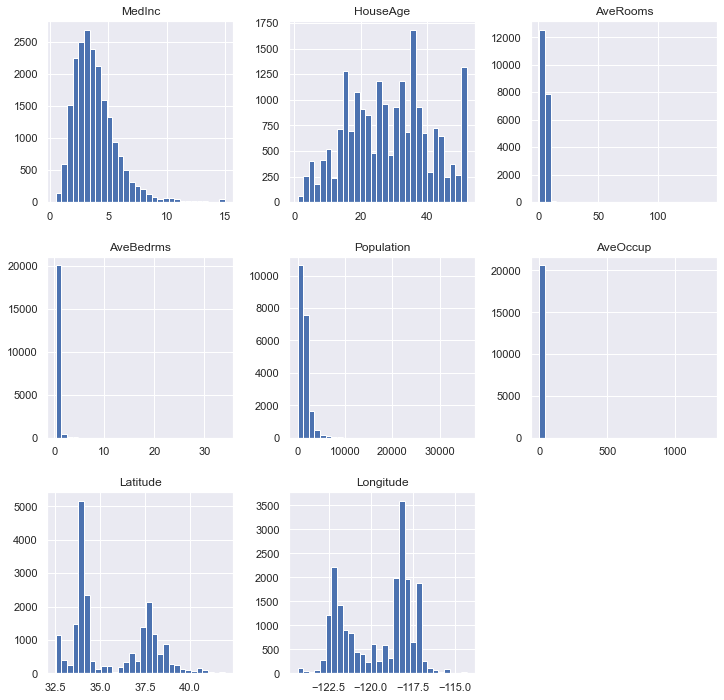

In [3]:
X.hist(bins=30, figsize=(12, 12))
plt.show()

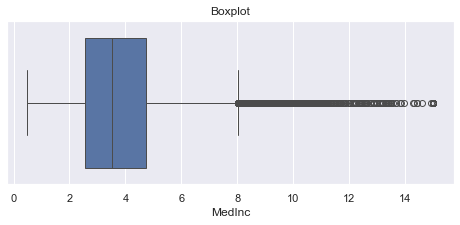

In [4]:
# boxplot
plt.figure(figsize=(8, 3))
sns.boxplot(data=X["MedInc"], orient="y")
plt.title("Boxplot")
plt.show()

In [5]:
def plot_boxplot_and_hist(data, variable):
    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
    f, (ax_box, ax_hist) = plt.subplots(
        2, sharex=True, gridspec_kw={"height_ratios": (0.50, 0.85)}
    )

    # assigning a graph to each ax
    sns.boxplot(x=data[variable], ax=ax_box)
    sns.histplot(data=data, x=variable, ax=ax_hist)

    # Remove x axis name for the boxplot
    plt.show()

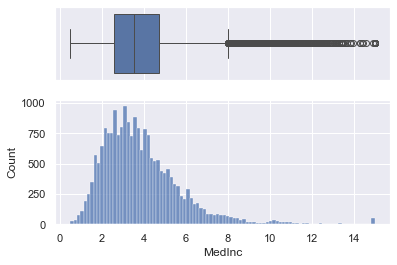

In [6]:
plot_boxplot_and_hist(X, "MedInc")

In [7]:
def find_limits(df, variable, fold):
    q1 = df[variable].quantile(0.25)
    q3 = df[variable].quantile(0.75)

    IQR = q3 - q1

    lower_limit = q1 - (IQR * fold)
    upper_limit = q3 + (IQR * fold)

    return lower_limit, upper_limit

In [8]:
# we find the limits

lower_limit, upper_limit = find_limits(X, "MedInc", 1.5)
lower_limit, upper_limit

(-0.7063750000000004, 8.013024999999999)

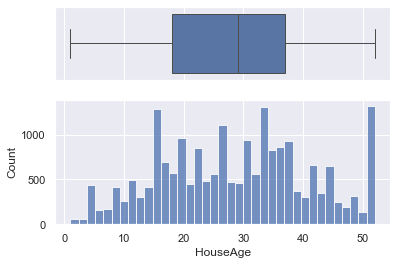

In [9]:
plot_boxplot_and_hist(X, "HouseAge")

In [10]:
# we find the limits

lower_limit, upper_limit = find_limits(X, "HouseAge", 1.5)
lower_limit, upper_limit

(-10.5, 65.5)

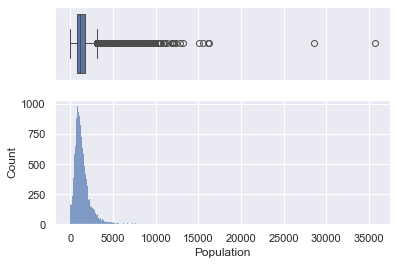

In [11]:
plot_boxplot_and_hist(X, "Population")

In [12]:
# we find the limits

lower_limit, upper_limit = find_limits(X, "Population", 1.5)
lower_limit, upper_limit

(-620.0, 3132.0)